In [12]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

KPI_data = {os.path.splitext(os.path.basename(file_name))[0] : pd.read_csv(file_name) for file_name in glob.glob('original_data/*')}

In [13]:
# for dataset_name in KPI_data:
#     print(dataset_name, KPI_data[dataset_name].columns[-1])
    
# dataset_country_name = [set(KPI_data[_].country) for _ in KPI_data]
# print(dataset_country_name[0].intersection(*dataset_country_name[1:]))
    

In [14]:
global_internet_users = pd.read_csv('original_data/global_internet_users.csv')

In [15]:
global_internet_users.describe()

,Unnamed: 0,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
count,8867.000000,8867.000000,8867.000000,8867.000000,8.867000e+03,8867.000000
mean,4433.000000,2000.151799,39.989614,17.043606,1.089138e+07,4.440695
std,2559.826752,11.812151,51.981410,26.883498,1.248841e+08,9.755705
min,0.000000,1980.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2216.500000,1990.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,4433.000000,2000.000000,5.501357,0.855662,1.004700e+04,0.000000
75%,6649.500000,2010.000000,82.231594,25.449939,8.664195e+05,2.007603
max,8866.000000,2020.000000,436.103027,100.000000,4.699886e+09,78.524361


In [ ]:
unique_entietes = global_internet_users['Entity'].unique()
unique_entietes.__len__()

In [17]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

<ipython-input-17-2254b7851a4c>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
gpd_global_internet_users = countries.set_index('iso_a3').join(global_internet_users.set_index('Code'))

In [19]:
def plot_global_map(df: pd.DataFrame, col: 'str', year: int):
    fig, ax = plt.subplots(figsize=(20, 10))
    df = df[df['Year'] == year]
    df.plot(column=col, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
    vmin = df[col].min()
    vmax = df[col].max()
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.title(year)
    plt.tight_layout()
    plt.colorbar(sm)

<ipython-input-19-8652b973d41c>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


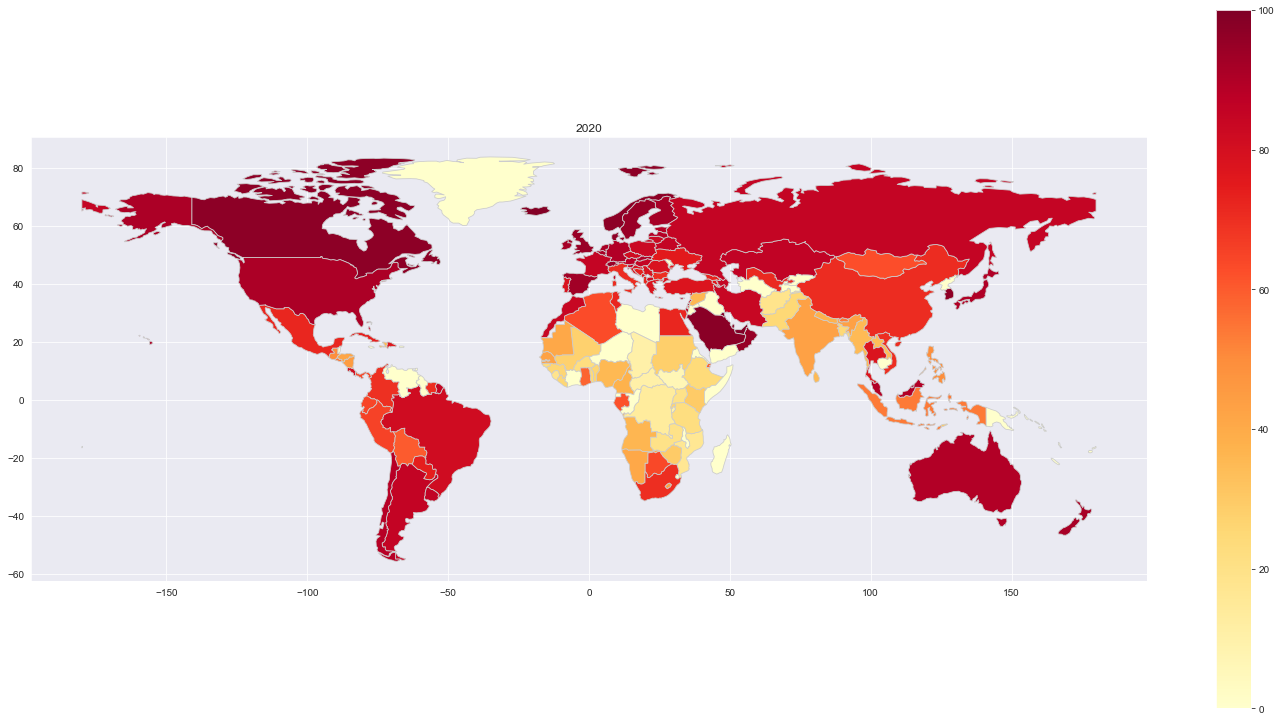

In [20]:
plot_global_map(gpd_global_internet_users, 'Internet Users(%)', 2020)

<ipython-input-19-8652b973d41c>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


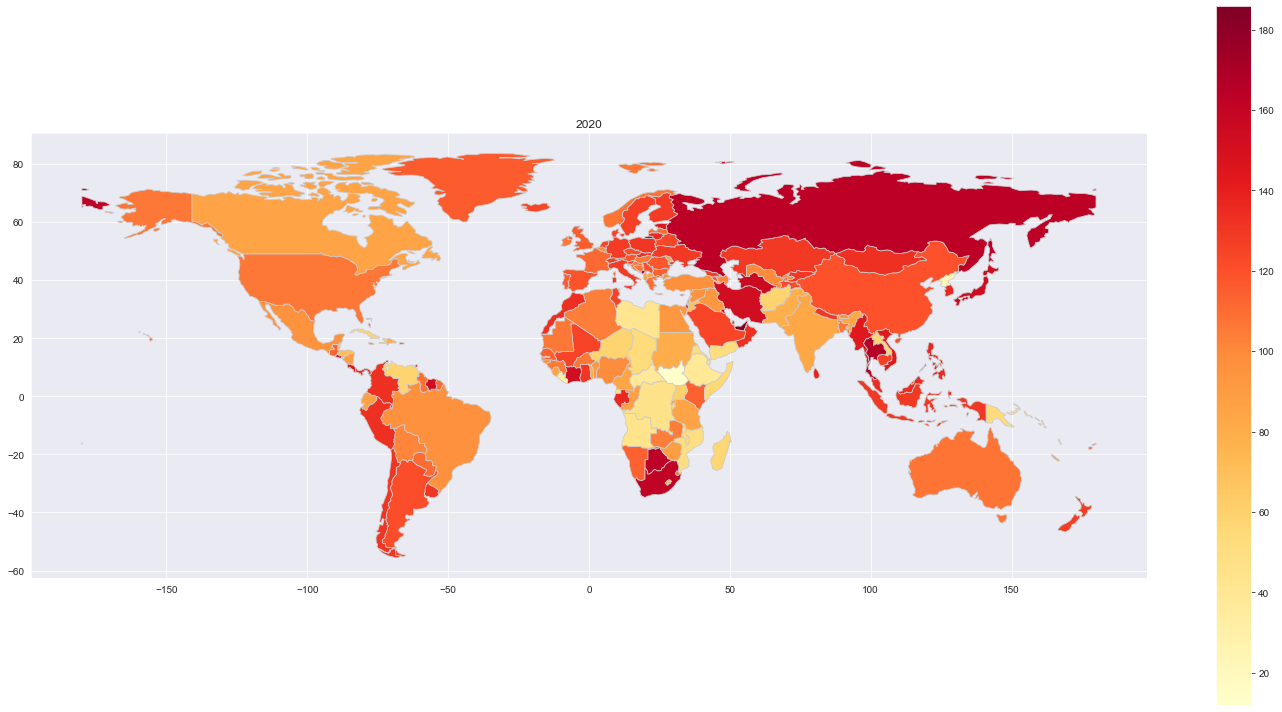

In [21]:
plot_global_map(gpd_global_internet_users, 'Cellular Subscription', 2020)

<ipython-input-19-8652b973d41c>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


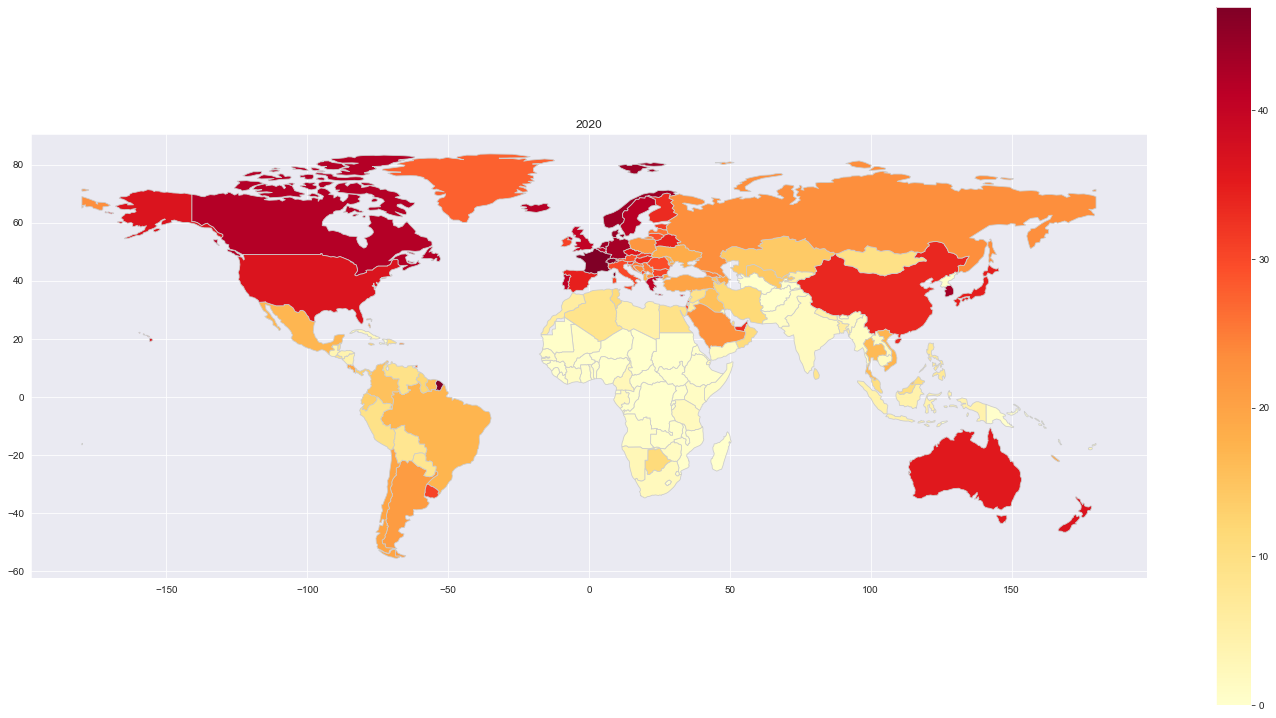

In [22]:
plot_global_map(gpd_global_internet_users, 'Broadband Subscription', 2020)

# Data Imputation